# Cleaning data 

In [21]:
!pip3 install langdetect

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 981 kB 2.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=994442 sha256=b5c316517a24eba4818bd5065d0303555f701d6feb68d7043853323591a4e9bf
  Stored in directory: /home/david/.cache/pip/wheels/53/88/5d/b239dc55d773b01fdd2059606b1a8f4b64548848b8f6e381c3
Successfully built langdetect


In [25]:
import pandas as pd
import json
import seaborn as sn
from langdetect import detect, detect_langs

In [3]:
with open('../OUTPUT/goodread_reviews_dataset.json', 'r') as f:
    data = json.load(f)

In [41]:
df = pd.DataFrame(data).T
print(len(df))
df.head()

51797


,review,grade
0,,it was amazing
1,I can see Never Let Me Go being great for book...,did not like it
2,"It's very important, if you're intending to re...",it was amazing
3,Ah f**kin' British writers! My inclination to ...,it was amazing
4,Let me start by saying that my review might co...,it was amazing


### How many are empty reviews?

In [16]:
df.review[df.review==''].count()

1832

In [43]:
df = df.drop(df[df['review']==''].index)

### Reviews that are not in english

In [47]:
def lang(text):
    try:
        lan = detect(text)
        return lan
    except:
        return None
    
    
df['lang'] = df.review.apply(lang)

In [53]:
df_clean = df[df['lang']=='en']

In [55]:
print(len(df_clean))
df_clean.head()

48198


,review,grade,lang
1,I can see Never Let Me Go being great for book...,did not like it,en
2,"It's very important, if you're intending to re...",it was amazing,en
3,Ah f**kin' British writers! My inclination to ...,it was amazing,en
4,Let me start by saying that my review might co...,it was amazing,en
5,"Imagine a restaurant, London, mid-2003.Publish...",liked it,en


In [56]:
def get_score(grade):
    d = {'it was amazing':4, 'really liked it':3, 'liked it':2, 'it was ok':1, 'did not like it':0}
    return d[grade]
df_clean['score'] = df_clean.grade.apply(get_score)    

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


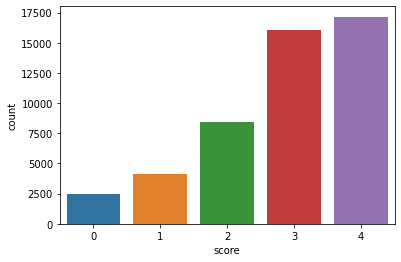

In [57]:
sn.countplot(df_clean.score)

Classes are very biased. Let's group them first

In [61]:
def get_sentiment(score):
    if score <= 1:
        return 0
    elif score==2:
        return 1
    else:
        return 2
    
df_clean['sentiment'] = df_clean.score.apply(get_sentiment)

/home/david/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


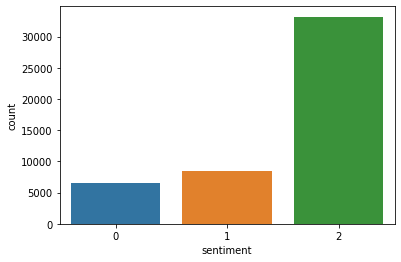

In [62]:
sn.countplot(df_clean.sentiment)

They are still very biased. So let's subset the data with all the negative and neutral reviews and a balance random sample of positive reviews:

In [64]:
print(len(df_clean[df_clean['sentiment']==0]), 'negative reviews')
print(len(df_clean[df_clean['sentiment']==1]), 'neutral reviews')
print(len(df_clean[df_clean['sentiment']==2]), 'positive reviews')

6586 negative reviews
8426 neutral reviews
33186 positive reviews


In [67]:
positive = df_clean[df_clean['sentiment']==2].sample(7500)
negative_neutral = df_clean[df_clean['sentiment']!=2]

In [76]:
df_clean_balance = pd.concat([positive, negative_neutral])

In [78]:
print(len(df_clean_balance))
df_clean_balance

22512


,review,grade,lang,score,sentiment
18840,"The statue of Hadrian, the 14th Emperor of the...",it was amazing,en,4,2
46392,It's hard to know what to think about this boo...,really liked it,en,3,2
14513,"If you're into stuff like this, you can read t...",it was amazing,en,4,2
16894,Has Kenzaburo Oe ever visited Japan? Ban this ...,it was amazing,en,4,2
7993,Sadza (typical cornmeal staple food in Zimbabw...,it was amazing,en,4,2
...,...,...,...,...,...
51788,"Somewhere in the latter half of Lord Jim, the ...",liked it,en,2,1
51792,Interesting psychological and philosophical st...,liked it,en,2,1
51795,This book gets 5/10.A book that I started out ...,it was ok,en,1,0
51796,"I'm glad I read this book in class, otherwise,...",liked it,en,2,1


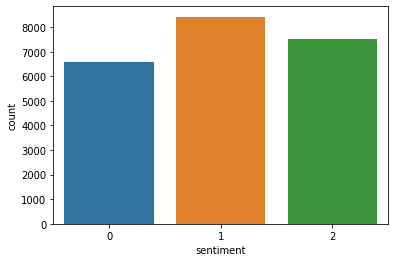

In [79]:
sn.countplot(df_clean_balance.sentiment)

In [80]:
df_clean_balance.to_csv('goodreads_reviews_clean.csv', index=False)